# Contents


0.   Goal
1.   Import libraries
2.   Load dataset
3.   Data analysis
    
    
    Regression models (I know): Regression, Ridge regression, Lasso regression, Elastic net, RandomForest, XGBoost, Neural nets

# Goal

The goal of this competition is to predict a song's beats-per-minute.

Test RSME score : 26.38054

# Import libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset

In [4]:
Train = pd.read_csv(r"F:\DATA\Kaggle_projects\Predicting the Beats-per-Minute of Songs\train.csv")
Test = pd.read_csv(r"F:\DATA\Kaggle_projects\Predicting the Beats-per-Minute of Songs\test.csv")
sample = pd.read_csv(r"F:\DATA\Kaggle_projects\Predicting the Beats-per-Minute of Songs\sample_submission.csv")

In [5]:
'''
Train = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")
Test = pd.read_csv("/kaggle/input/playground-series-s5e9/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s5e9/sample_submission.csv")
'''

'\nTrain = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")\nTest = pd.read_csv("/kaggle/input/playground-series-s5e9/test.csv")\nsample = pd.read_csv("/kaggle/input/playground-series-s5e9/sample_submission.csv")\n'

# Data analysis

In [6]:
print('Train shape:',Train.shape)
print('Train info:',Train.info())
print('Test shape:',Test.shape)
print('Test info:',Test.info())

Train shape: (524164, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
Train info: None
Test shape: (174722, 10)
<class 'pandas.core.frame.Da

In [7]:
Train.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [8]:
Test.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [9]:
Test.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
count,174722.000000,174722.000000,174722.000000,174722.000000,174722.000000,174722.000000,174722.000000,174722.000000,174722.000000,174722.000000
mean,611524.500000,0.632591,-8.377495,0.074475,0.262903,0.117407,0.178317,0.555861,241753.736419,0.500545
std,50438.041204,0.157229,4.622288,0.050024,0.222899,0.131628,0.118165,0.226218,59103.896616,0.290550
min,524164.000000,0.140859,-27.442731,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067
25%,567844.250000,0.514918,-11.550095,0.023500,0.069448,0.000001,0.077821,0.403788,207518.151300,0.253817
50%,611524.500000,0.634556,-8.253186,0.066432,0.242412,0.073968,0.165956,0.566015,243584.585400,0.511867
75%,655204.750000,0.739179,-4.903740,0.107302,0.396870,0.202977,0.268133,0.716694,281737.445300,0.746133
max,698885.000000,0.975000,-1.357000,0.258857,0.995000,0.680914,0.599544,0.978000,449288.808400,0.999867


In [10]:
Train.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [11]:
# droping the columns with ID from both train and test datasets
train = Train.drop(['id'], axis=1)
test = Test.drop(['id'], axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1) separate features and target
features = train.iloc[:, :-1]
predictions = train.iloc[:, -1] # (Last column contains the target variable)

# 2) split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, predictions, test_size=0.3, random_state=42)

# 3) scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test)

# 4) convert scaled arrays back to DataFrames (optional, but useful for inspection)
X_train = pd.DataFrame(X_train, columns=features.columns)
X_val = pd.DataFrame(X_val, columns=features.columns)
test = pd.DataFrame(test, columns=features.columns)

print("Scaled shape of train data:", X_train.shape)
print("Scaled shape of validation data:", X_val.shape)
print("Scaled shape of test data:", test.shape)

Scaled shape of train data: (366914, 9)
Scaled shape of validation data: (157250, 9)
Scaled shape of test data: (174722, 9)


### impact of standardising

In [13]:
print('scaled X_train description:',X_train.describe())
print('scaled X_val description:',X_val.describe())

scaled X_train description:         RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
count  3.669140e+05   3.669140e+05  3.669140e+05     3.669140e+05   
mean   2.777092e-16   2.009545e-16 -6.991675e-16    -6.255016e-18   
std    1.000001e+00   1.000001e+00  1.000001e+00     1.000001e+00   
min   -3.456745e+00  -4.126015e+00 -1.021263e+00    -1.178159e+00   
25%   -7.460783e-01  -6.870589e-01 -1.021263e+00    -8.673752e-01   
50%    1.154068e-02   2.713417e-02 -1.604476e-01    -9.118507e-02   
75%    6.776392e-01   7.515523e-01  6.615200e-01     6.009813e-01   
max    2.180902e+00   1.520536e+00  3.643363e+00     3.282520e+00   

       InstrumentalScore  LivePerformanceLikelihood     MoodScore  \
count       3.669140e+05               3.669140e+05  3.669140e+05   
mean       -5.027251e-17              -1.302321e-17  6.092347e-17   
std         1.000001e+00               1.000001e+00  1.000001e+00   
min        -8.926835e-01              -1.304280e+00 -2.349002e+00   
25%  

In [14]:
st_train = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
st_train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,-0.785831,-1.008298,0.504776,0.475237,-0.608600,-1.255799,-0.740249,1.601103,1.605865,98.15932
1,1.018503,-0.286125,0.735815,0.187973,-0.892683,-1.304280,1.035952,-0.145302,0.053487,106.63541
2,0.370306,0.821878,1.203860,-0.947980,1.182520,-0.875901,0.155164,-0.303619,-0.288984,85.62617
3,0.702371,-0.835444,-1.021263,-0.957239,-0.744250,-0.436866,-2.133898,-0.666599,0.767847,110.31507
4,0.261346,1.520536,-1.021263,-1.178159,-0.892683,0.575064,0.620712,-0.978904,0.258969,138.77723


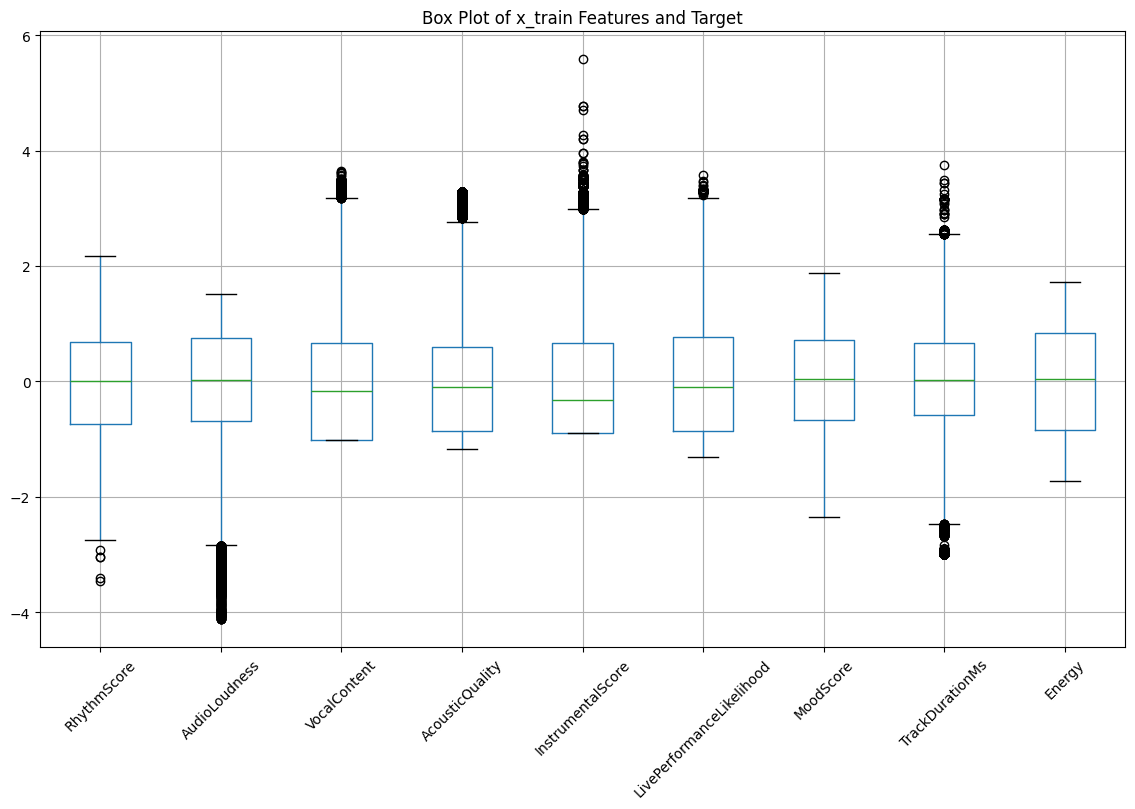

In [15]:
plt.figure(figsize=(14, 8))
X_train.boxplot()
plt.title("Box Plot of x_train Features and Target")
plt.xticks(rotation=45)
plt.show()

<Axes: >

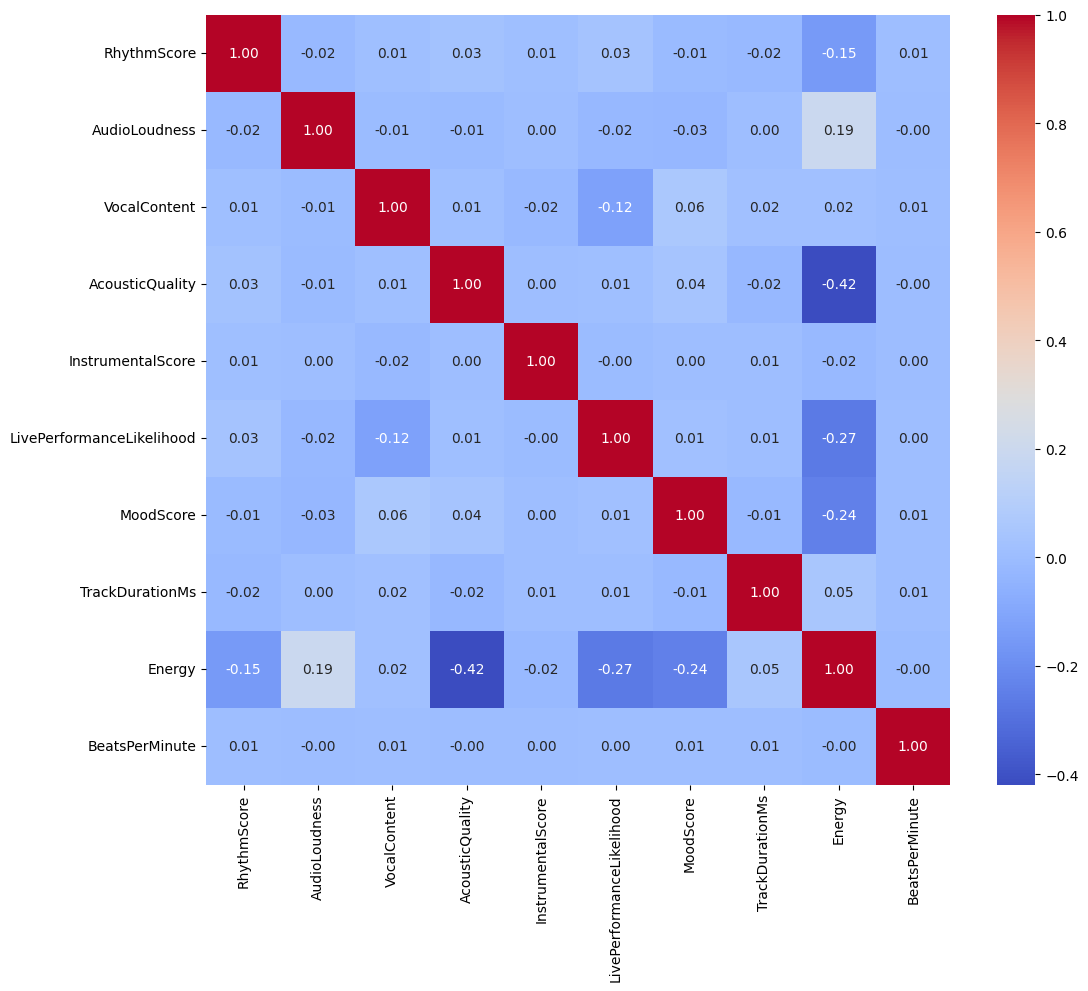

In [16]:
import seaborn as sns
cor_matrix = st_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm')


In [17]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor(   
    n_estimators=200,        # start with 100
    max_depth=15,            # limit depth (None = unlimited)
    max_features='sqrt',     # common choice
    min_samples_leaf=6,
    n_jobs=-1,               # use all cores
    random_state=42,
    verbose=0,
    criterion='squared_error')
rf.fit(X_train, y_train)
rfpre = rf.predict(X_val)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)

mse = mean_squared_error(y_val, rfpre)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, rfpre)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")


Train time (s): 42.95319986343384
Root Mean Squared Error (RMSE): 26.471517787466972
R-squared (R2 ): -3.608243647690301e-05


In [18]:
# Feature importance
import pandas as pd
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feat_imp.head(20))

TrackDurationMs              0.128876
RhythmScore                  0.123991
Energy                       0.123545
AudioLoudness                0.111807
VocalContent                 0.107636
LivePerformanceLikelihood    0.107459
AcousticQuality              0.103088
MoodScore                    0.100862
InstrumentalScore            0.092735
dtype: float64


In [19]:
# Hyperparameter tuning — RandomizedSearchCV
'''
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
 'n_estimators': [50,100,200,400],
 'max_depth': [6,10,15,25],
 'min_samples_split': [2,5,10],
 'min_samples_leaf': [1,2,4,8],
 'max_features': ['sqrt','log2', 0.2, 0.5],
 'bootstrap': [True, False]
}
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
rs = RandomizedSearchCV(rfr, param_distributions=param_dist,
                        n_iter=30, scoring='neg_mean_squared_error',
                        cv=3, verbose=2, n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
best_rf = rs.best_estimator_
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nparam_dist = {\n \'n_estimators\': [50,100,200,400],\n \'max_depth\': [6,10,15,25],\n \'min_samples_split\': [2,5,10],\n \'min_samples_leaf\': [1,2,4,8],\n \'max_features\': [\'sqrt\',\'log2\', 0.2, 0.5],\n \'bootstrap\': [True, False]\n}\nrfr = RandomForestRegressor(random_state=42, n_jobs=-1)\nrs = RandomizedSearchCV(rfr, param_distributions=param_dist,\n                        n_iter=30, scoring=\'neg_mean_squared_error\',\n                        cv=3, verbose=2, n_jobs=-1, random_state=42)\nrs.fit(X_train, y_train)\nprint("Best params:", rs.best_params_)\nbest_rf = rs.best_estimator_\n'

Result: Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': True}

In [20]:
# Hyperparameter tuned randomforest model
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor(   
    n_estimators=100,        # start with 100
    max_depth=6,            # limit depth (None = unlimited)
    max_features='log2',     # common choice
    min_samples_leaf=1,
    min_samples_split=2,
    n_jobs=-1,               # use all cores
    random_state=42,
    verbose=0,
    criterion='squared_error')
rf.fit(X_train, y_train)
rf_pre = rf.predict(X_val)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)

mse = mean_squared_error(y_val, rf_pre)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, rf_pre)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

Train time (s): 8.980103969573975
Root Mean Squared Error (RMSE): 26.463603171188417
R-squared (R2 ): 0.0005618219751892806


In [21]:
'''
pip install xgboost
'''

'\npip install xgboost\n'

In [22]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=6,
                   subsample=0.8, colsample_bytree=0.8, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)

xgbpre = xgb.predict(X_val)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)

mse = mean_squared_error(y_val, xgbpre)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, xgbpre)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")


Train time (s): 8.335485458374023
Root Mean Squared Error (RMSE): 26.466565938331673
R-squared (R2 ): 0.0003380226434460676


In [23]:
# Hyperparameter tuning — RandomizedSearchCV
'''
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Parameter grid (based on Random Forest results + XGB extras)
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 5, 10]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Print results
print("Best parameters found: ", random_search.best_params_)

'''

'\nfrom xgboost import XGBRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\nimport numpy as np\n\n# Define the model\nxgb = XGBRegressor(\n    objective=\'reg:squarederror\',\n    random_state=42,\n    n_jobs=-1\n)\n\n# Parameter grid (based on Random Forest results + XGB extras)\nparam_grid = {\n    "n_estimators": [100, 200, 300, 400],\n    "max_depth": [4, 6, 8, 10],\n    "learning_rate": [0.01, 0.05, 0.1, 0.2],\n    "subsample": [0.6, 0.8, 1.0],\n    "colsample_bytree": [0.5, 0.7, 1.0],\n    "min_child_weight": [1, 3, 5],\n    "gamma": [0, 1, 5],\n    "reg_alpha": [0, 0.1, 1],\n    "reg_lambda": [1, 5, 10]\n}\n\n# RandomizedSearchCV setup\nrandom_search = RandomizedSearchCV(\n    estimator=xgb,\n    param_distributions=param_grid,\n    n_iter=30,\n    scoring=\'neg_mean_squared_error\',\n    cv=5,\n    verbose=2,\n    random_state=42,\n    n_jobs=-1\n)\n\n# Fit to training data\nrandom_search.fit(X_train, y_train)\n\n# Print results\nprint("Best parameters found: "

Result: Fitting 5 folds for each of 30 candidates, totalling 150 fits


Best parameters found:  {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}

In [24]:
# Hyperparameter tuned XGBoost model
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.01, 
    max_depth=4,
    subsample=0.6, 
    colsample_bytree=0.7,
    reg_lambda=1,
    reg_alpha=0,
    min_child_weight=5, 
    n_jobs=-1, 
    random_state=42)
xgb.fit(X_train, y_train)

xgb_pre = xgb.predict(X_val)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)

mse = mean_squared_error(y_val, xgb_pre)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, xgb_pre)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")


Train time (s): 7.947911024093628
Root Mean Squared Error (RMSE): 26.46482541732622
R-squared (R2 ): 0.0004694998787163618


Models

| Model                    | Train Time (s) | RMSE   | R²   |
|---------------------------|----------------|--------|------|
| Random Forest             | 45.67          | 26.4715 | -0.00 |
| Random Forest (tuned)     | 8.68           | 26.4636  | 0.00056 |
| XGBoost                   | 8.71           | 26.4665  | 0.00034 |
| XGBoost (tuned)           | 8.57           | 26.4648  | 0.00047 |


In [25]:
predict = rf.predict(test)
submission = pd.DataFrame({
    "id": Test["id"],
    "target": predict
})

In [26]:
submission.to_csv("submission.csv", index=False)
submission.head()

,id,target
0,524164,119.928138
1,524165,119.011137
2,524166,119.144308
3,524167,119.390172
4,524168,119.041473


In [27]:
'''from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)

# Train LightGBM
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42, n_jobs=-1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_val)

# Average predictions
ensemble_pred = (rf_pred + lgbm_pred) / 2

# Evaluate
mse = mean_squared_error(y_val, ensemble_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, ensemble_pred)

print(f"Ensemble RMSE: {rmse}")
print(f"Ensemble R²: {r2}")
'''

'from sklearn.ensemble import RandomForestRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n\n# Train Random Forest\nrf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)\nrf.fit(X_train, y_train)\nrf_pred = rf.predict(X_val)\n\n# Train LightGBM\nlgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42, n_jobs=-1)\nlgbm.fit(X_train, y_train)\nlgbm_pred = lgbm.predict(X_val)\n\n# Average predictions\nensemble_pred = (rf_pred + lgbm_pred) / 2\n\n# Evaluate\nmse = mean_squared_error(y_val, ensemble_pred)\nrmse = np.sqrt(mse)\nr2 = r2_score(y_val, ensemble_pred)\n\nprint(f"Ensemble RMSE: {rmse}")\nprint(f"Ensemble R²: {r2}")\n'

In [28]:
'''from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# First-stage predictions
stack_train = np.column_stack((rf_pred, lgbm_pred))

# Meta-model
meta_model = LinearRegression()
meta_model.fit(stack_train, y_val)

# Final prediction
stack_pred = meta_model.predict(stack_train)

# Evaluate
mse = mean_squared_error(y_val, stack_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, stack_pred)

print(f"Stacked RMSE: {rmse}")
print(f"Stacked R²: {r2}")
'''

'from sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import KFold\n\n# First-stage predictions\nstack_train = np.column_stack((rf_pred, lgbm_pred))\n\n# Meta-model\nmeta_model = LinearRegression()\nmeta_model.fit(stack_train, y_val)\n\n# Final prediction\nstack_pred = meta_model.predict(stack_train)\n\n# Evaluate\nmse = mean_squared_error(y_val, stack_pred)\nrmse = np.sqrt(mse)\nr2 = r2_score(y_val, stack_pred)\n\nprint(f"Stacked RMSE: {rmse}")\nprint(f"Stacked R²: {r2}")\n'

In [29]:
from lightgbm import LGBMRegressor
# Train LightGBM
lgbm = LGBMRegressor(n_estimators=1000,
    learning_rate=0.01,
    num_leaves=31,
    colsample_bytree=0.7,
    subsample=0.7,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42)
lgbm.fit(X_train, y_train)

lgbmpre = lgbm.predict(X_val)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)


rmse = np.sqrt(mean_squared_error(y_val, lgbmpre))
r2 = r2_score(y_val, lgbmpre)

print(f" RMSE: {rmse}")
print(f" R²: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 366914, number of used features: 9
[LightGBM] [Info] Start training from score 119.061227
Train time (s): 8.232889175415039
 RMSE: 26.466045321363556
 R²: 0.0003773504406581196


In [30]:
# Hyperparameter tuning — RandomizedSearchCV
'''from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
import numpy as np

# Define base model
lgbm = LGBMRegressor(objective='regression', random_state=42)

# Parameter grid
param_dist = {
    'num_leaves': np.arange(20, 200, 10),
    'max_depth': [-1, 3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(200, 2000, 200),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [5, 10, 20, 30, 50],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1]
}

# K-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,  # increase to 100+ if you have time
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)
'''

'from lightgbm import LGBMRegressor\nfrom sklearn.model_selection import RandomizedSearchCV, KFold\nimport numpy as np\n\n# Define base model\nlgbm = LGBMRegressor(objective=\'regression\', random_state=42)\n\n# Parameter grid\nparam_dist = {\n    \'num_leaves\': np.arange(20, 200, 10),\n    \'max_depth\': [-1, 3, 5, 7, 9, 11],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'n_estimators\': np.arange(200, 2000, 200),\n    \'subsample\': [0.6, 0.7, 0.8, 0.9, 1.0],\n    \'colsample_bytree\': [0.6, 0.7, 0.8, 0.9, 1.0],\n    \'min_child_samples\': [5, 10, 20, 30, 50],\n    \'reg_alpha\': [0, 0.01, 0.1, 0.5, 1],\n    \'reg_lambda\': [0, 0.01, 0.1, 0.5, 1]\n}\n\n# K-Fold CV\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\n\n# Randomized Search\nrandom_search = RandomizedSearchCV(\n    estimator=lgbm,\n    param_distributions=param_dist,\n    n_iter=50,  # increase to 100+ if you have time\n    scoring=\'neg_root_mean_squared_error\',\n    cv=kf,\n    verbose=2,\n    random_stat

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0, 'num_leaves': np.int64(20), 'n_estimators': np.int64(200), 'min_child_samples': 10, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best RMSE: 26.459112280724604

In [31]:
# Hyperparameter tuned LightGBM model

from lightgbm import LGBMRegressor
# Train LightGBM
lgbm = LGBMRegressor(n_estimators=1000,
    learning_rate=0.01,
    num_leaves=31,
    colsample_bytree=0.8,
    subsample=0.6,
    reg_alpha=0,
    reg_lambda=1,
    min_child_samples=10,
    max_depth=3,
    random_state=42)
lgbm.fit(X_train, y_train)

lgbm_pre = lgbm.predict(X_val)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)


rmse = np.sqrt(mean_squared_error(y_val, lgbm_pre))
r2 = r2_score(y_val, lgbm_pre)

print(f" RMSE: {rmse}")
print(f" R²: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 366914, number of used features: 9
[LightGBM] [Info] Start training from score 119.061227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [32]:
from sklearn.linear_model import LinearRegression
rf_pred = rf.predict(X_val)
lgbm_pred = lgbm.predict(X_val)
xgb_pred = xgb.predict(X_val)

# --------------------------
# Meta-model
# --------------------------
# Stack base model predictions as new features
stack_train = np.column_stack((rf_pred, lgbm_pred, xgb_pred))

# Linear Regression as meta-learner
meta_model = LinearRegression()
meta_model.fit(stack_train, y_val)

# Final stacked predictions
stack_pred = meta_model.predict(stack_train)

# --------------------------
# Evaluation
# --------------------------
t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)


rmse = np.sqrt(mean_squared_error(y_val, stack_pred))
r2 = r2_score(y_val, stack_pred)

print(f"Stacked RMSE: {rmse}")
print(f"Stacked R²: {r2}")


Train time (s): 7.988219261169434
Stacked RMSE: 26.46278293048625
Stacked R²: 0.00062377628753707


Models

| Model                    | Train Time (s) | RMSE   | R²   |
|---------------------------|----------------|--------|------|
| Random Forest             | 45.67          | 26.4715 | -0.00 |
| Random Forest (tuned)     | 8.68           | 26.4636  | 0.00056 |
| XGBoost                   | 8.71           | 26.4665  | 0.00034 |
| XGBoost (tuned)           | 8.57           | 26.4648  | 0.00047 |
| LGBM                      | 8.26           | 26.4660  | 0.00037 |
| LGBM (tunrd)              | 8.34           | 26.4638  | 0.00054 |
| rf+xgb+lgbm               | 8.10           | 26.4626  | 0.00063 |


In [33]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
def get_oof_predictions(model, X, y, n_splits=5):
    oof_train = np.zeros(X.shape[0])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        oof_train[val_idx] = model.predict(X_val)
    
    return oof_train


In [34]:
rf_oof = get_oof_predictions(rf, X_train, y_train)
xgb_oof = get_oof_predictions(xgb, X_train, y_train)
lgbm_oof = get_oof_predictions(lgbm, X_train, y_train)

# Stack predictions as new features
X_meta = pd.DataFrame({
    'rf_pred': rf_oof,
    'xgb_pred': xgb_oof,
    'lgbm_pred': lgbm_oof
})


meta_model = Ridge(alpha=1.0, random_state=42)
meta_model.fit(X_meta, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 293531, number of used features: 9
[LightGBM] [Info] Start training from score 119.050950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Ridge(random_state=42)

In [35]:
# Predict on validation set for base models
rf_val_pred = rf.predict(X_val)
xgb_val_pred = xgb.predict(X_val)
lgbm_val_pred = lgbm.predict(X_val)

# Stack them for meta-model
X_val_meta = pd.DataFrame({
    'rf_pred': rf_val_pred,
    'xgb_pred': xgb_val_pred,
    'lgbm_pred': lgbm_val_pred
})

# Meta-model final prediction
final_pred = meta_model.predict(X_val_meta)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()
print("Train time (s):", t1 - t0)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_val, final_pred))
r2 = r2_score(y_val, stack_pred)

print(f"Stacked RMSE: {rmse}")
print(f"Stacked R²: {r2}")

Train time (s): 8.133487462997437
Stacked RMSE: 26.464692387348965
Stacked R²: 0.00062377628753707


In [36]:
from sklearn.ensemble import StackingRegressor

stacked_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)

# --- Train & Evaluate ---
t0 = time.time()
stacked_model.fit(X_train, y_train)
t1 = time.time()

preds = stacked_model.predict(X_val)

mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, preds)

print("Train time (s):", t1 - t0)
print(f"Stacked RMSE: {rmse}")
print(f"Stacked R²: {r2}")

Train time (s): 117.98498058319092
Stacked RMSE: 26.46321834437394
Stacked R²: 0.0005908889024232034


Models

| Model                            | Train Time (s) | RMSE     | R²      |
|----------------------------------|----------------|----------|---------|
| Random Forest                    | 45.67          | 26.4715  | -0.00   |
| Random Forest (tuned)            | 8.68           | 26.4636  | 0.00056 |
| XGBoost                          | 8.71           | 26.4665  | 0.00034 |
| XGBoost (tuned)                  | 8.57           | 26.4648  | 0.00047 |
| LGBM                             | 8.26           | 26.4660  | 0.00037 |
| LGBM (tunrd)                     | 8.34           | 26.4638  | 0.00054 |
| rf+xgb+lgbm (linear)             | 8.10           | 26.4626  | 0.00063 |
| rf+xgb+lgbm (ridge)              | 8.07           | 26.4649  | 0.00059 |
| rf+xgb+lgbm (stackingregressor)  | 73.39          | 26.4635  | 0.00056 |


In [37]:
test.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,-1.420663,-1.822983,-1.021263,-0.134021,-0.796425,0.788861,0.480775,1.028550,-0.263471
1,-1.082442,1.520536,1.348453,-0.919393,1.064233,-0.683633,1.212810,-0.335057,1.188465
2,0.342270,1.084797,1.869843,0.112164,0.707457,1.248680,-1.111251,1.952540,-1.266058
3,1.612240,0.602019,0.881198,-1.178159,1.966777,-0.372049,-0.301547,0.504195,-0.637200
4,0.028780,0.283626,1.033632,1.238544,-0.369589,-1.304280,0.157030,0.604278,-0.069711


In [38]:
# Step 1: Generate base model predictions on test set
rf_test_pred = rf.predict(test)
xgb_test_pred = xgb.predict(test)
lgbm_test_pred = lgbm.predict(test)

# Step 2: Stack predictions into new feature set for meta-model
stacked_test = np.column_stack((rf_test_pred, xgb_test_pred, lgbm_test_pred))

# Step 3: Use meta-model to predict final output
final_pred = meta_model.predict(stacked_test)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [39]:
final=pd.DataFrame({
    "id": Test["id"],
    "BeatsPerMinute": final_pred
})
final.head()


,id,BeatsPerMinute
0,524164,119.855462
1,524165,119.014927
2,524166,119.465126
3,524167,119.473135
4,524168,119.053677


In [40]:
print(final.shape)
print(final.info())

(174722, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              174722 non-null  int64  
 1   BeatsPerMinute  174722 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.7 MB
None


In [41]:
final.to_csv("final_submission.csv", index=False)